# **Movie Recommendation System**


**Recommender System** is a system that seeks to predict filter preferences according to the user's choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags and products in general.

## **Objective**
* Develop a basic recommendation system by suggesting movies that are most similar to particular movies.
* To recommend 10 most similar movies

## **Data Source**
The data source is Github repository of YBI Foundation

"https://github.com/YBI-Foundation/Dataset/blob/main/Movies%20Recommendation.csv"

## Import Libraries

In [98]:
import pandas as pd
import numpy as np
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [99]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning projects/Movies Recommendation.csv')

In [100]:
data.head(3)

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


## Describe Data

In [101]:
# Give the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [102]:
# check the shape of the dataset
data.shape

(4760, 21)

In [103]:
# check columns in dataset
data.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

In [104]:
# Describe the data
data.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Data Visualization

In [105]:
cat_cols = data.select_dtypes(include='object')

In [106]:
cat_cols = cat_cols.drop(columns = ['Movie_Title','Movie_Tagline','Movie_Cast','Movie_Director','Movie_Release_Date','Movie_Homepage','Movie_Overview','Movie_Crew'])

In [107]:
for i, col in enumerate(cat_cols):
  print(f'The value counts in {col} is as follows')
  print(cat_cols[col].value_counts())
  print('')

The value counts in Movie_Genre is as follows
Movie_Genre
Drama                                        368
Comedy                                       282
Drama Romance                                164
Comedy Romance                               143
Comedy Drama                                 142
                                            ... 
Romance Comedy Crime Fantasy                   1
Documentary Action Adventure                   1
Drama Mystery Romance Thriller                 1
Comedy Mystery Thriller                        1
Action Adventure Animation Family Fantasy      1
Name: count, Length: 1164, dtype: int64

The value counts in Movie_Language is as follows
Movie_Language
en    4465
fr      69
es      32
de      27
zh      25
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ar       2
cs       2
ta       2
id       2
ro       2
xx       1
ky       1
te       1
is       1
p

In [108]:
# plotting a histplot for numerical columns
num_cols = data.select_dtypes(include='number')
num_cols.columns


Index(['Movie_ID', 'Movie_Budget', 'Movie_Popularity', 'Movie_Revenue',
       'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count'],
      dtype='object')

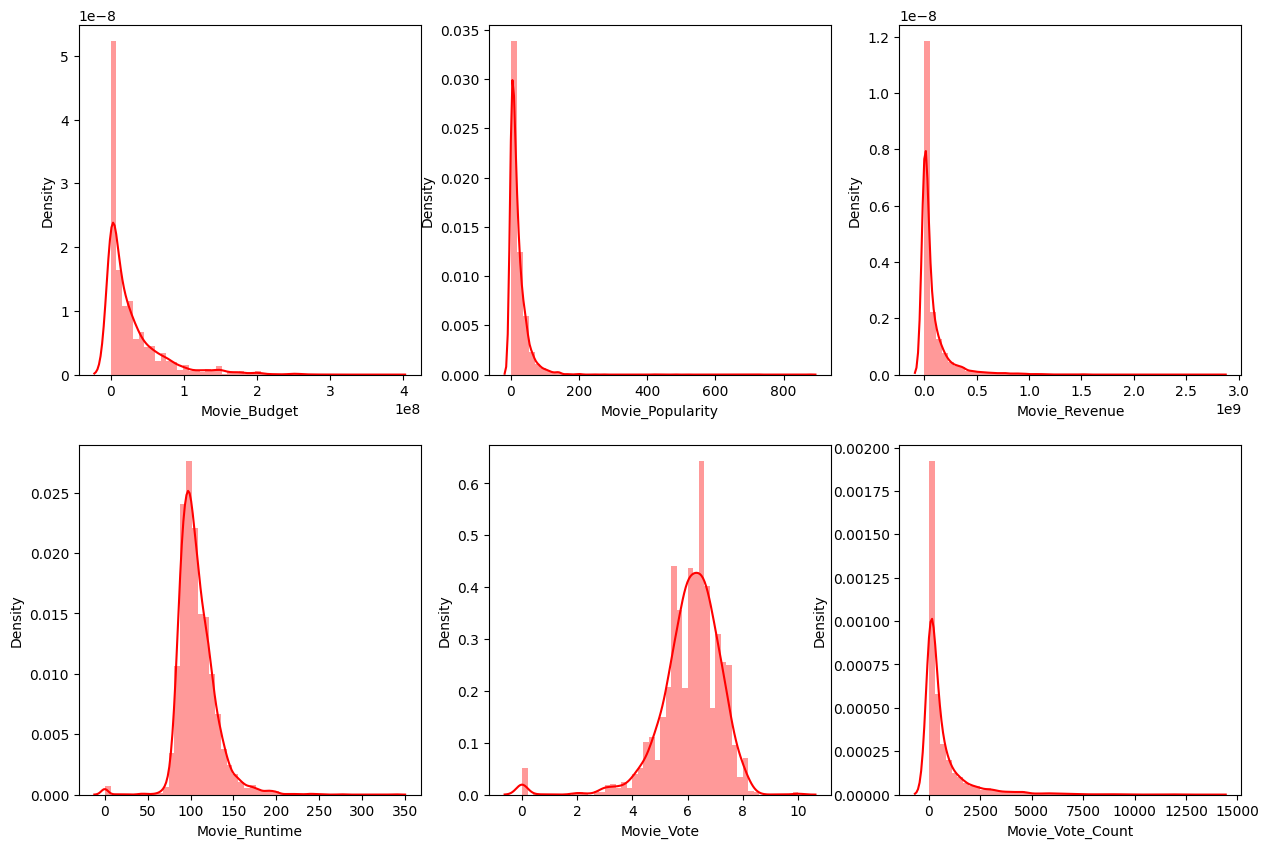

In [109]:
fig, axs = plt.subplots(2,3, figsize=(15,10))
for i, col in enumerate(num_cols.drop(columns = ['Movie_ID'])):
  sns.distplot(num_cols[col], ax=axs[i//3, i%3],  color = 'red')

## Data Pre-processing

In [110]:
# check the null values
data.isnull().sum()

,0
Movie_ID,0
Movie_Title,0
Movie_Genre,0
Movie_Language,0
Movie_Budget,0
Movie_Popularity,0
Movie_Release_Date,0
Movie_Revenue,0
Movie_Runtime,2
Movie_Vote,0


In [111]:
# replace the nan values with space
data = data.fillna('')

## Define Target Variable (y) and Feature Variables (X)

In [112]:
## Get feature selection
# Combine text columns into a single column for vectorization
X = data['Movie_Genre'].astype(str) + ' ' + \
                            data['Movie_Keywords'].astype(str) + ' ' + \
                            data['Movie_Tagline'].astype(str) + ' ' + \
                            data['Movie_Cast'].astype(str) + ' ' + \
                            data['Movie_Director'].astype(str) + ' ' + \
                            data['Movie_Vote'].astype(str)

In [113]:
X.isnull().sum()

0

In [114]:
X.shape

(4760,)

In [115]:
X.head()

,0
0,Crime Comedy hotel new year's eve witch bet ho...
1,Adventure Action Science Fiction android galax...
2,Animation Family father son relationship harbo...
3,Comedy Drama Romance vietnam veteran hippie me...
4,Drama male nudity female nudity adultery midli...


## Modelling

In [116]:
# Function to get cosine similarity based recommendations
def get_similar_movies(movie_title, data):

    vectorizer = TfidfVectorizer(stop_words='english')
    # Assuming 'data' contains the text column you want to vectorize,
    # replace 'text_column' with the actual column name
    matrix = vectorizer.fit_transform(X)
    cosine_sim = cosine_similarity(matrix)

    list_of_all_titles = data['Movie_Title'].tolist()

    find_close_match = difflib.get_close_matches(movie_title, list_of_all_titles)

    close_match = find_close_match[0]

    index_of_the_movie = data[data.Movie_Title == close_match]['Movie_ID'].values[0]

    recommendation_scores = list(enumerate(cosine_sim[index_of_the_movie]))
    sorted_similar_movies = sorted(recommendation_scores, key=lambda x: x[1], reverse=True)

    similar_movies = []
    for i, movie in enumerate(sorted_similar_movies):
        index = movie[0]
        if index != index_of_the_movie:
            similar_movies.append(data.iloc[index]['Movie_Title'])
        if len(similar_movies) >= 10:  # Limit to top 10 similar movies
            break

    return similar_movies


## Prediction

In [117]:
user_input = input("Enter a movie title: ")
similar_movies = get_similar_movies(user_input, data)
print("Recommended movies:")
for i, movie in enumerate(similar_movies):
    print(i+1 , '.', movie)

Enter a movie title: Spiderman
Recommended movies:
1 . Spider-Man 3
2 . Spider-Man
3 . The Amazing Spider-Man 2
4 . Oz: The Great and Powerful
5 . 30 Minutes or Less
6 . Avengers: Age of Ultron
7 . Abduction
8 . X-Men: Days of Future Past
9 . Iron Man 2
10 . A History of Violence


## Explaination
1. Here we created a movie recommendation system, which will recommend 10 most similar movies when we give input as out favourite movie.
2. I have used the dataset which is present on Github page of YBI Foundation.
3. Data contains 4760 rows and 21 columns.
4. I have used Tfidfvectorization to convert movie description into numerical vectors.
5. The function then calculates the cosine similarity between these vectors to determine how similar each pair of movies is.
6.  When a user inputs a movie title, the code first finds the closest match in the dataset using a text-matching tool, then retrieves the most similar movies based on their cosine similarity scores. Finally, it returns and displays the top 10 movies that are most similar to the one the user entered.